## Importing Dependencies

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/train.csv')

# 1. How big is the data?

In [3]:
df.shape

(891, 12)

# 2. How does the data look like?

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. what is the data type of cols

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4. Are there any missing values in the dataset?

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 5. How does the data look mathematically?

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 6. Are there duplicate values in the data?

In [13]:
df.duplicated().sum()

0

# 7. How is the correlation betwwen cols?

In [16]:
df.corr(numeric_only=True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Univariate Analysis

## 1. Categorical

#a . countplot

In [17]:
import seaborn as sns

In [18]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
survived_counts = df['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']

<Axes: xlabel='Survived', ylabel='Count'>

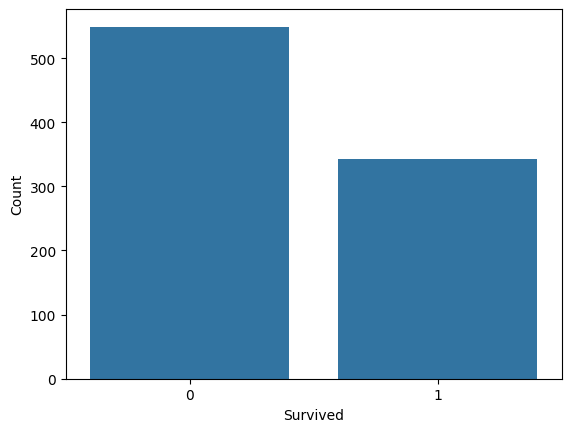

In [20]:
sns.barplot(x='Survived', y='Count', data=survived_counts)

<Axes: xlabel='count', ylabel='Embarked'>

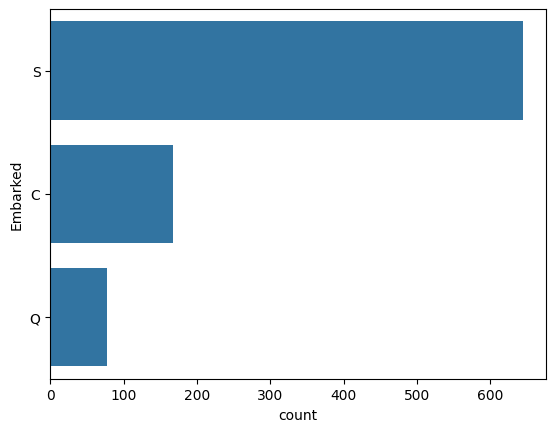

In [22]:
sns.countplot(df['Embarked'])

# b. PieChart

<Axes: ylabel='count'>

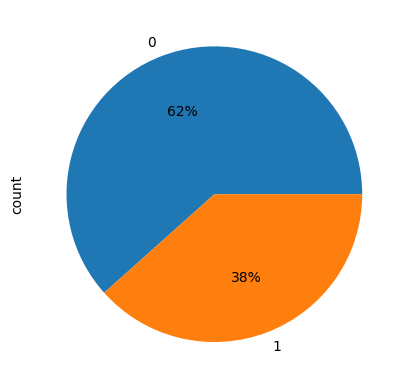

In [24]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Numerical data

#a. Histogram

In [25]:
import matplotlib.pyplot as plt

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

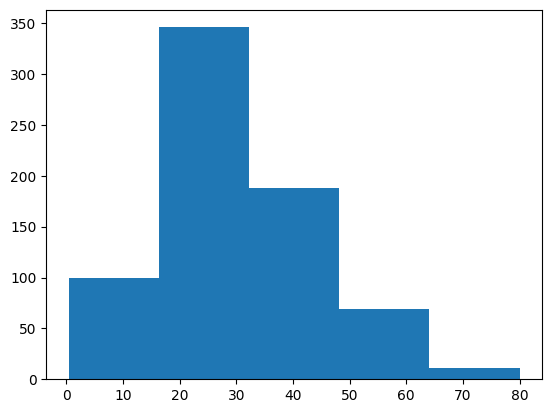

In [29]:
plt.hist(df['Age'], bins=5)

# b. Displot

<ipython-input-30-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

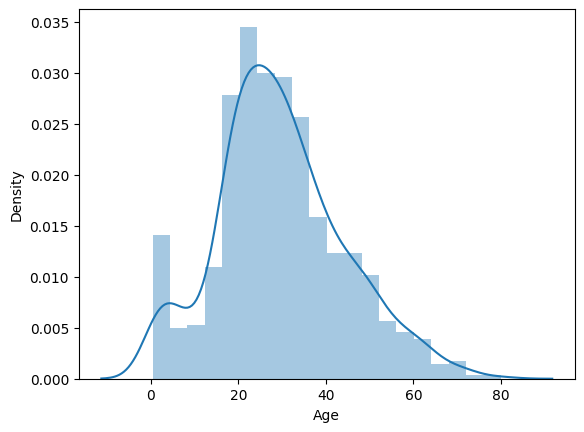

In [30]:
sns.distplot(df['Age'])

In [32]:
df['Age'].min()

0.42

In [34]:
df['Age'].max()

80.0

In [35]:
df['Age'].mean()

29.69911764705882

## Multivariate/Bivariate analysis

In [36]:
tips = sns.load_dataset('tips')

In [40]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
flights = sns.load_dataset('flights')

In [41]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [38]:
iris = sns.load_dataset('iris')

In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Numerical - Numerical

# 1. Scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

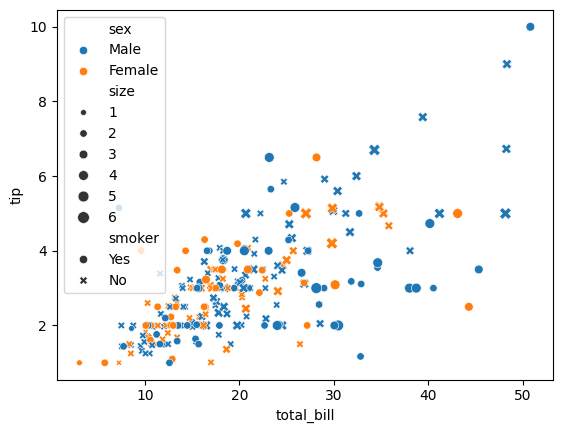

In [47]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', style = 'smoker', size='size')

## Numerical- categotical

# 1. Barplot

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

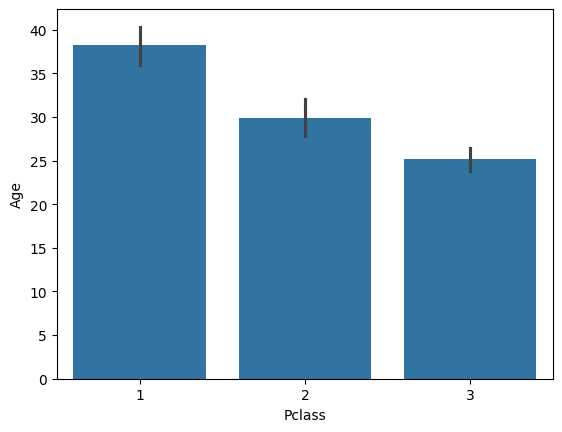

In [49]:
sns.barplot(x='Pclass', y='Age', data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

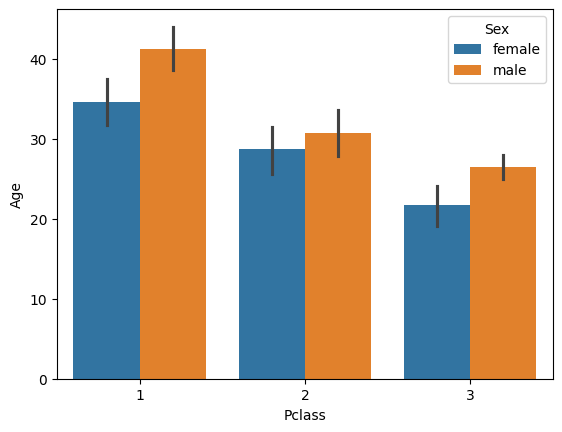

In [53]:
sns.barplot(x='Pclass', y='Age', data=df, hue='Sex' )

# Numerical- categotical

# 2. Distplot

<ipython-input-59-6a2590635ecf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'], hist=False)
<ipython-input-59-6a2590635ecf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'], hist=False)


<Axes: xlabel='Age', ylabel='Density'>

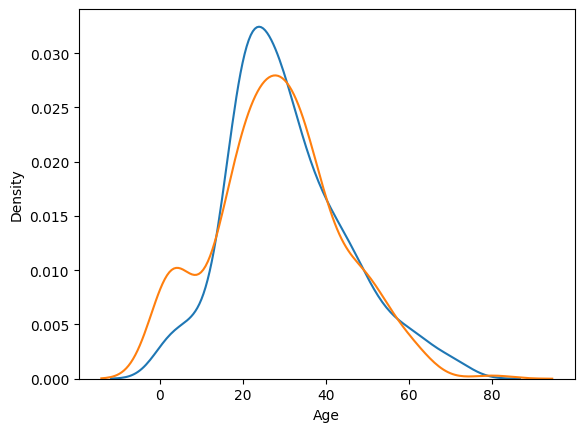

In [59]:
sns.distplot(df[df['Survived']==0]['Age'], hist=False)
sns.distplot(df[df['Survived']==1]['Age'], hist=False)

# Categorical- categorical

In [64]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

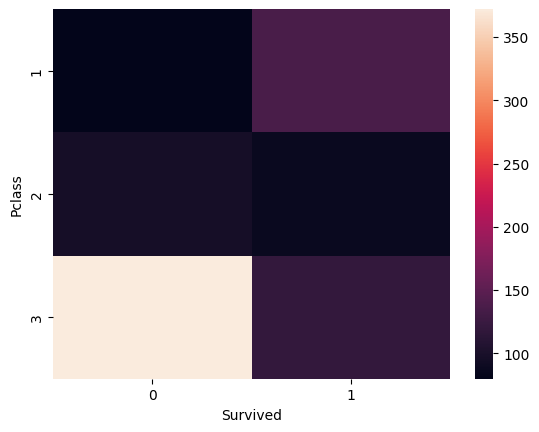

In [63]:
sns.heatmap(pd.crosstab(df['Pclass'], df['Survived']))

In [66]:
df.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [67]:
df.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [68]:
df.groupby('Embarked')['Survived'].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

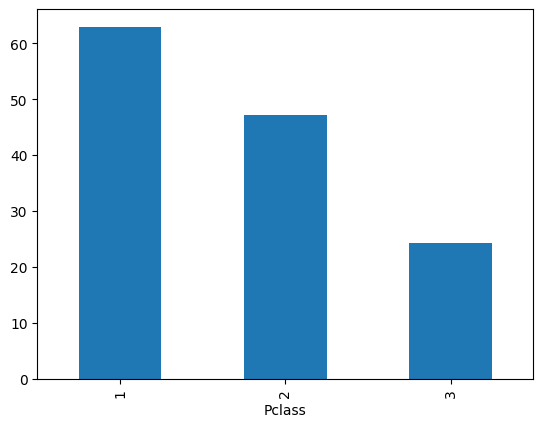

In [69]:
(df.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar')

# PairPlot

In [70]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


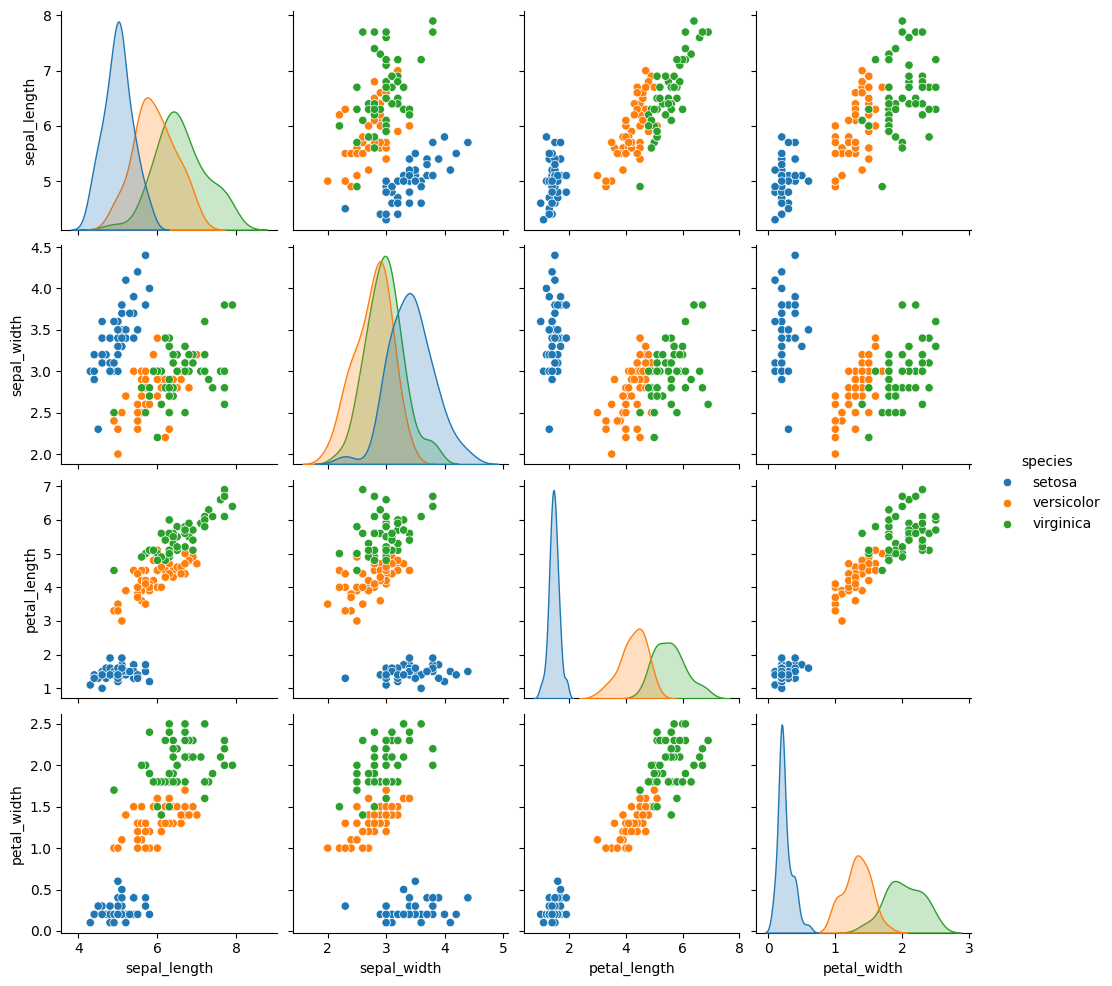

In [72]:
sns.pairplot(iris, hue='species')

# Numerical-Numerical

# Lineplot

In [75]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [78]:
new = flights.groupby('year')['passengers'].sum().reset_index()
new

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

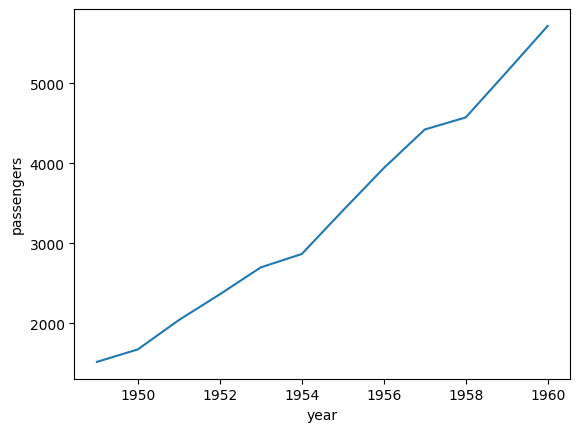

In [79]:
sns.lineplot(x='year', y='passengers', data=new)

<Axes: xlabel='year', ylabel='month'>

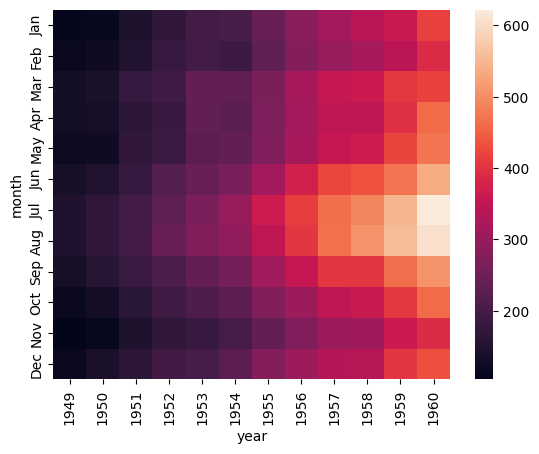

In [81]:
sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))